In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessiom

/kaggle/input/analiysis-on-parkinsons-disease/parkinsons.csv


Importing the dependencies

In [2]:
# Importing Libraries
import requests
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Data Gathering

In [3]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/kaggle/input/analiysis-on-parkinsons-disease/parkinsons.csv')

In [4]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# 2. Data Cleaning & Preprocessing



In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# Replace infinite values with NaN
parkinsons_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Feature Selection

In [9]:
# Select only numeric columns
numeric_data = parkinsons_data.select_dtypes(include=['number'])


<Axes: xlabel='status', ylabel='count'>

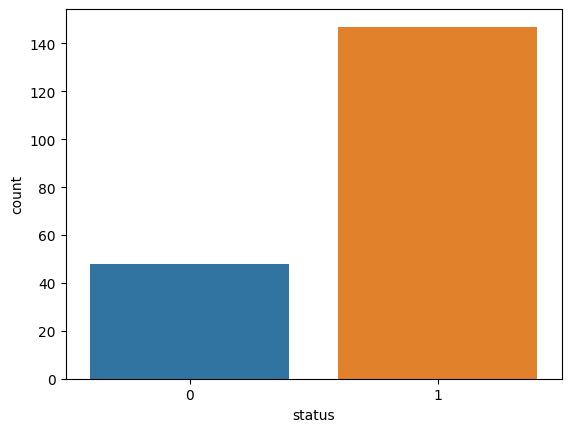

In [10]:
#Balance of Data
sns.countplot(x='status', data=parkinsons_data)

statistical measures

In [11]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


correlation heatmap

<Axes: >

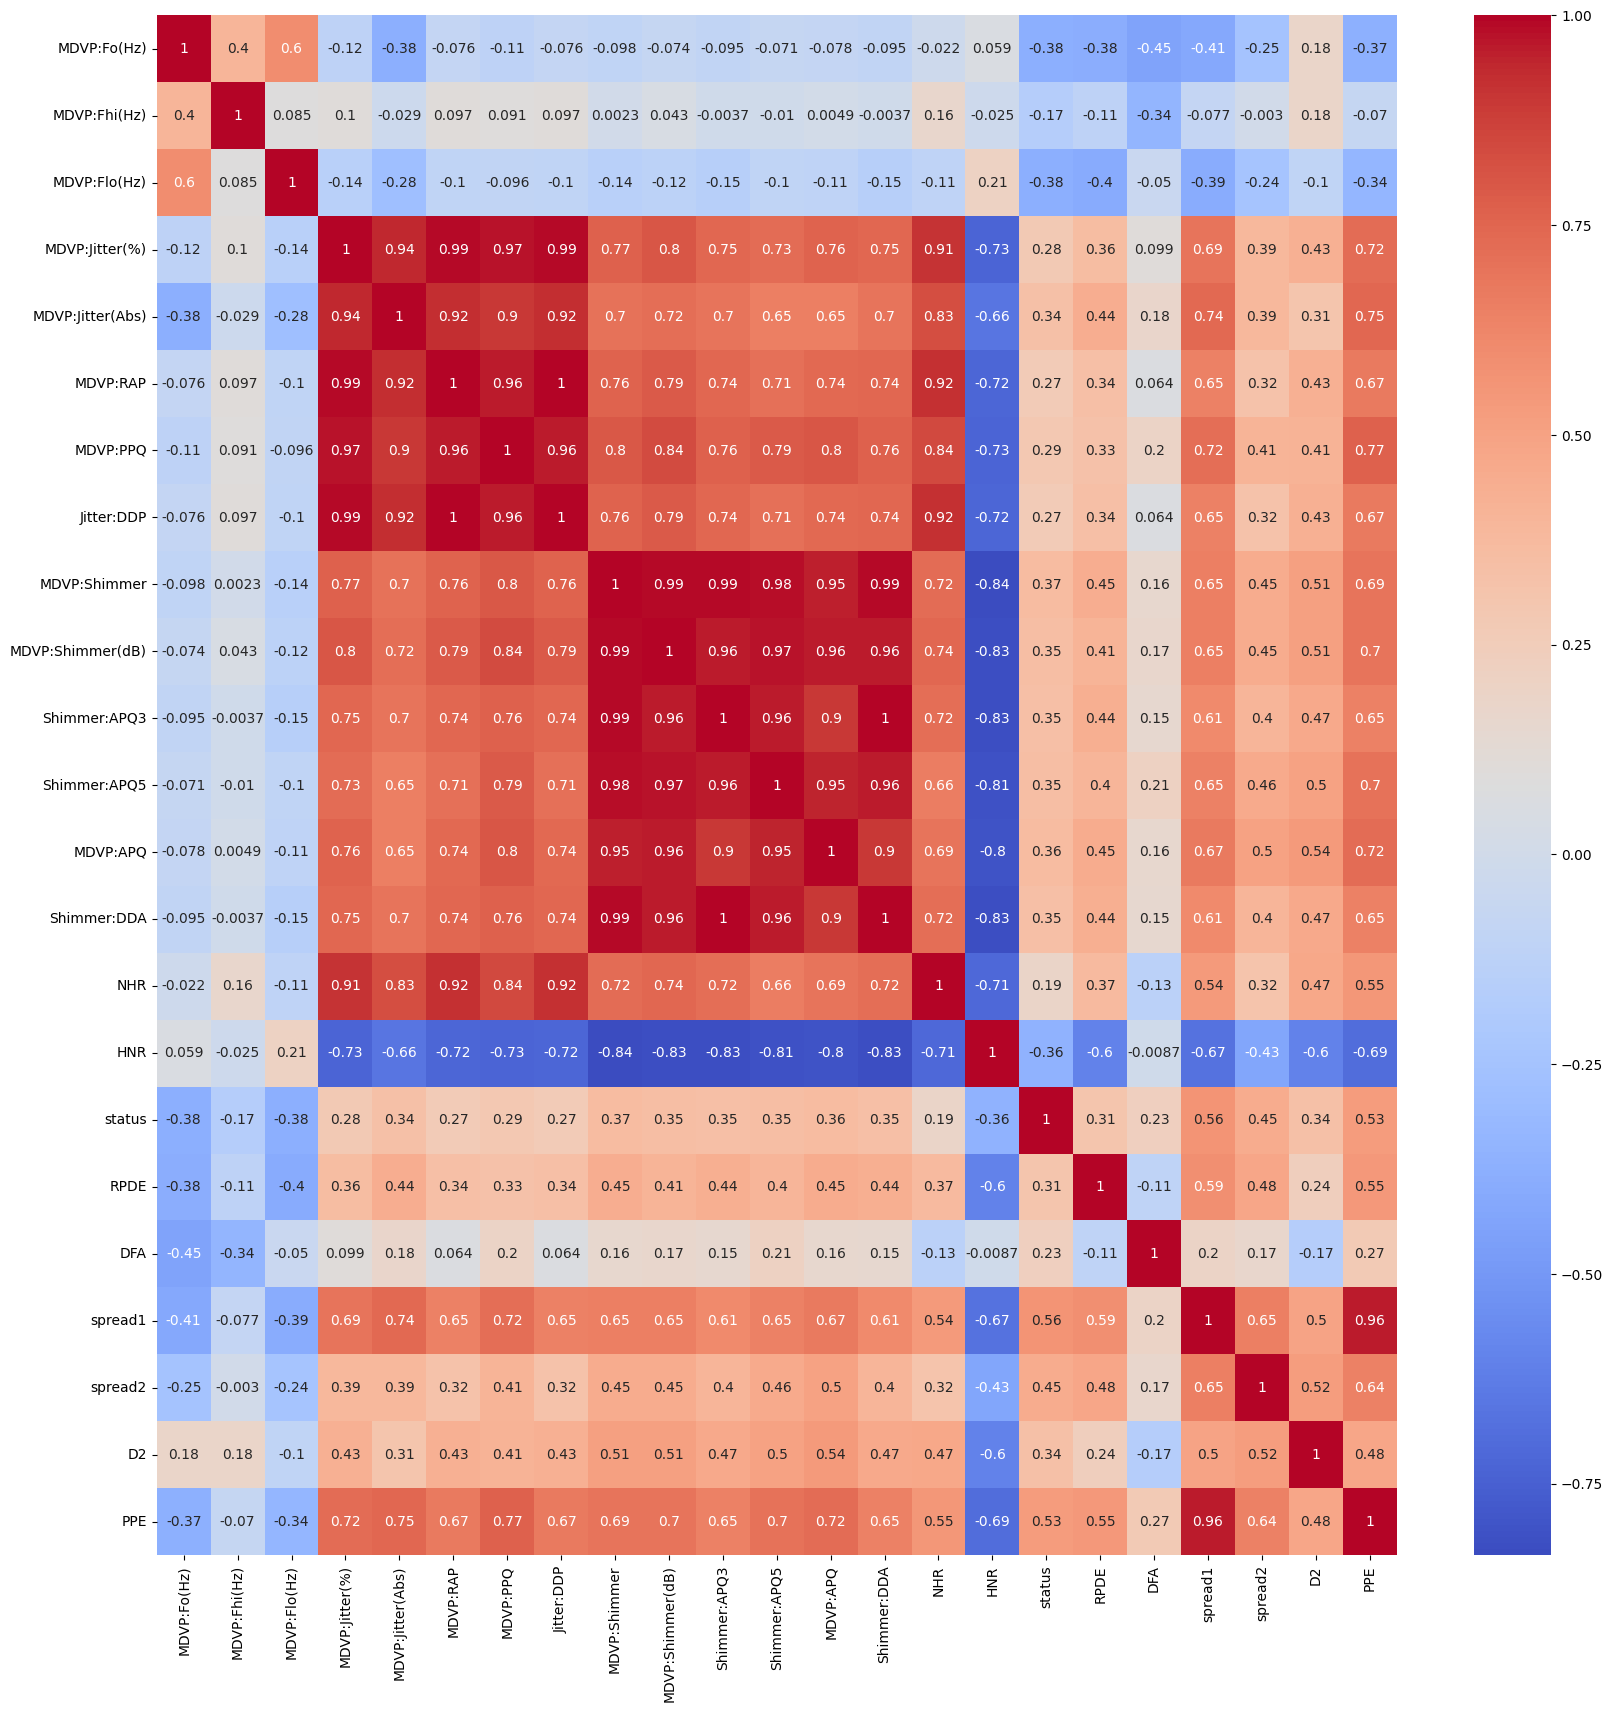

In [12]:
#In this correlation heatmap, we can see that many independent features are highly correlated with eachother.
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', ax=ax)

Box Plot

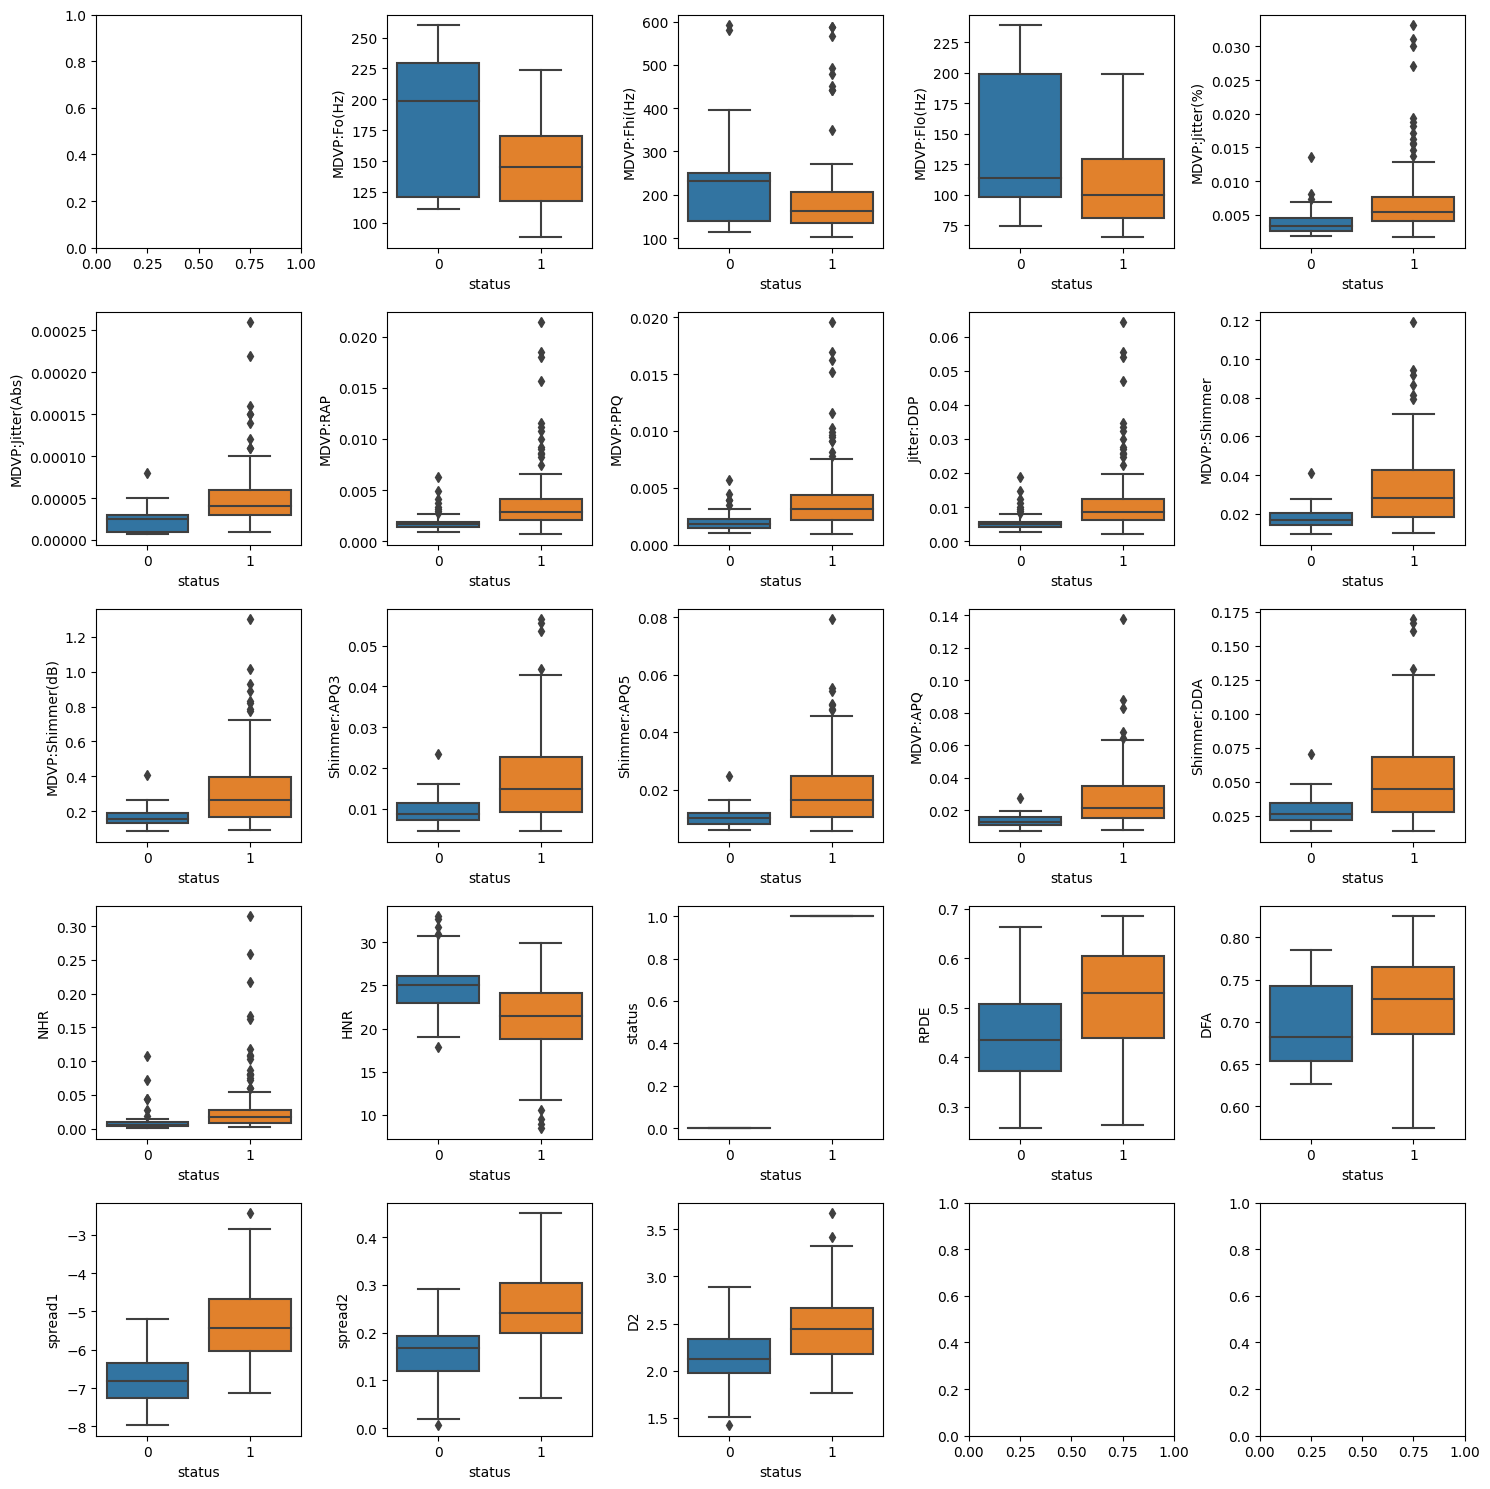

In [13]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(parkinsons_data.columns)-1):
    sns.boxplot(x='status',y=parkinsons_data.iloc[:,i],data=parkinsons_data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

# 4. Data Splitting

Splitting the data into features and target

In [14]:
#6. Data Splitting
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)  # Drop 'name' and 'status' columns
Y = parkinsons_data['status']  # 'status' is the target variable

Split the dataset into training and testing sets (80% train, 20% test)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
# 7. Data Standardization (StandardScaler)
scaler = StandardScaler()  # Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data

# 8. Handling Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE for oversampling
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)  # Resample the training data


# 5. Model Selection and Training

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, Y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Support Vector Machine
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)


SVC(kernel='linear')

# 6. Model Evaluation (Accuracy, F1 Score, and Recall Score)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Function to print evaluation metrics
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Training and testing predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    print(f"Training Accuracy: {accuracy_score(Y_train, y_train_pred) * 100:.2f}%")
    print(f"Testing Accuracy: {accuracy_score(Y_test, y_test_pred) * 100:.2f}%")
    
    # F1 Score and Recall Score
    print(f"F1 Score: {f1_score(Y_test, y_test_pred):.2f}")
    print(f"Recall Score: {recall_score(Y_test, y_test_pred):.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_test_pred)
    print("Confusion Matrix:")
    print(cm)

# Evaluate all models
print("Logistic Regression Evaluation:")
evaluate_model(logistic_model, X_train, Y_train, X_test, Y_test)

print("\nDecision Tree Evaluation:")
evaluate_model(dt_model, X_train, Y_train, X_test, Y_test)

print("\nRandom Forest Evaluation:")
evaluate_model(rf_model, X_train, Y_train, X_test, Y_test)

print("\nSupport Vector Machine Evaluation:")
evaluate_model(svm_model, X_train, Y_train, X_test, Y_test)

Logistic Regression Evaluation:
Training Accuracy: 87.82%
Testing Accuracy: 87.18%
F1 Score: 0.92
Recall Score: 0.97
Confusion Matrix:
[[ 4  4]
 [ 1 30]]

Decision Tree Evaluation:
Training Accuracy: 100.00%
Testing Accuracy: 74.36%
F1 Score: 0.81
Recall Score: 0.71
Confusion Matrix:
[[ 7  1]
 [ 9 22]]

Random Forest Evaluation:
Training Accuracy: 100.00%
Testing Accuracy: 84.62%
F1 Score: 0.90
Recall Score: 0.87
Confusion Matrix:
[[ 6  2]
 [ 4 27]]

Support Vector Machine Evaluation:
Training Accuracy: 87.18%
Testing Accuracy: 87.18%
F1 Score: 0.92
Recall Score: 0.97
Confusion Matrix:
[[ 4  4]
 [ 1 30]]


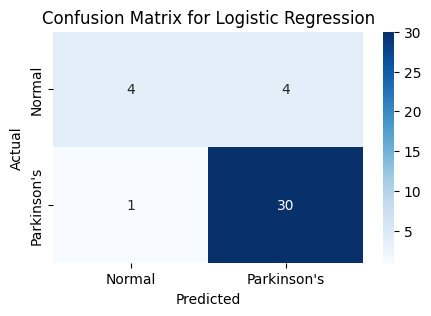

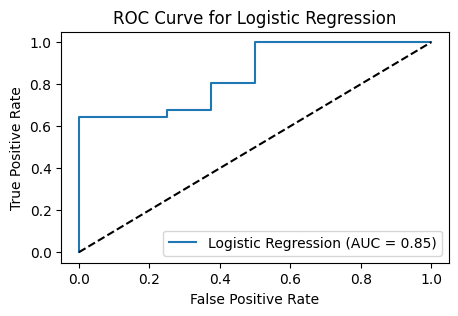

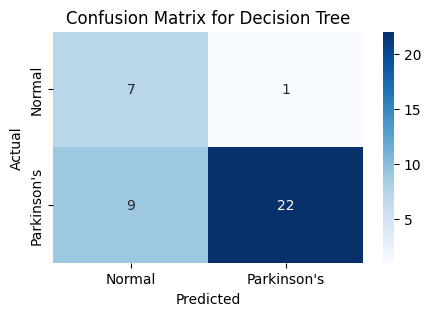

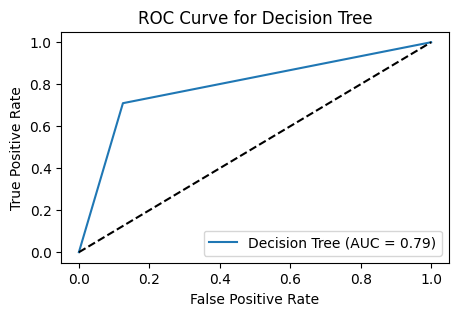

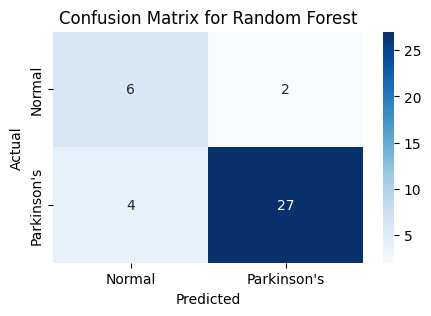

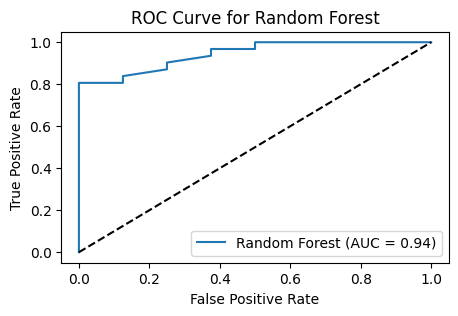

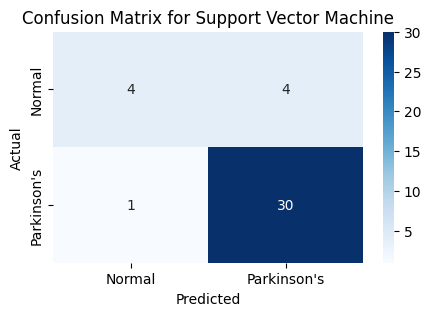

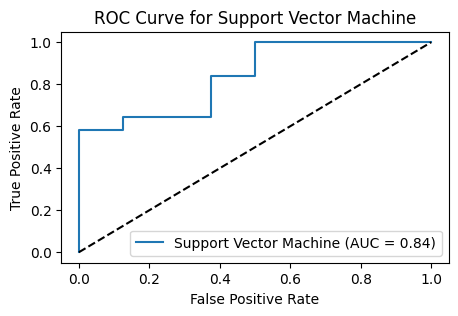

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Parkinson\'s'], 
                yticklabels=['Normal', 'Parkinson\'s'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X_test, Y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Plot for each model
models = [
    (logistic_model, "Logistic Regression"),
    (dt_model, "Decision Tree"),
    (rf_model, "Random Forest"),
    (svm_model, "Support Vector Machine")
]

for model, name in models:
    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(Y_test, y_test_pred, name)
    plot_roc_curve(model, X_test, Y_test, name)


# 7. Comparison of Predicted vs Actual Results

In [20]:
# Comparison for Logistic Regression as an example
import pandas as pd

# Creating a comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted_LR': logistic_model.predict(X_test),
    'Predicted_SVM': svm_model.predict(X_test),
    'Predicted_RF': rf_model.predict(X_test),
    'Predicted_DT': dt_model.predict(X_test)
})

# Display the first few rows of the comparison
print(comparison_df.head(20))


     Actual  Predicted_LR  Predicted_SVM  Predicted_RF  Predicted_DT
10        1             1              1             1             1
79        1             1              1             1             1
164       1             1              1             1             1
142       1             1              1             1             1
186       0             0              0             0             0
133       1             1              1             0             0
35        0             0              0             0             0
137       1             1              1             1             1
25        1             1              1             1             1
2         1             1              1             1             1
12        1             1              1             0             0
128       1             1              1             0             0
144       1             1              1             1             1
3         1             1         

# 8. Visualization of Comparison Between Predicted and Actual Results

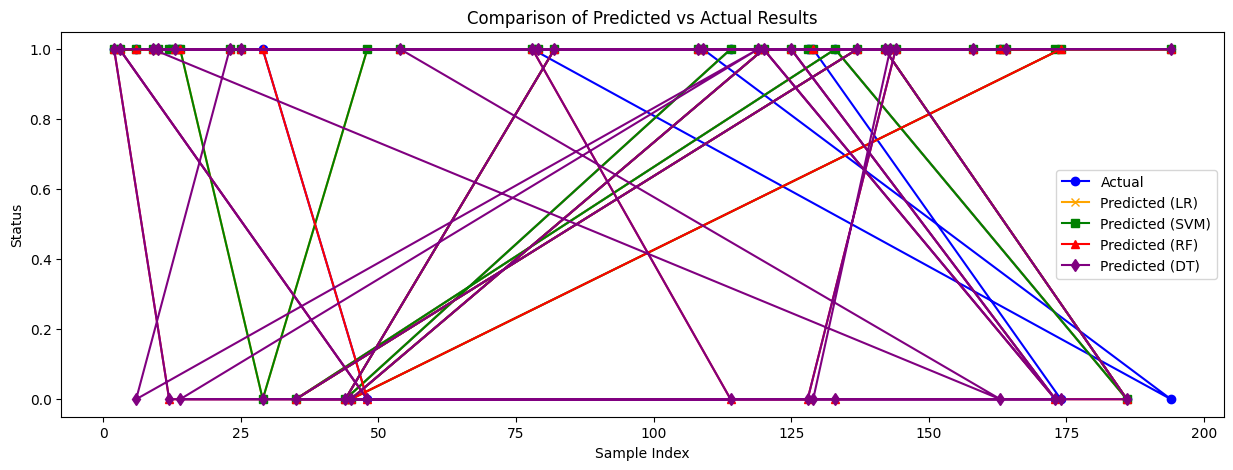

In [21]:
import matplotlib.pyplot as plt

# Plot comparison between Actual and Predicted values including Decision Tree
comparison_df.reset_index(inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(comparison_df['index'], comparison_df['Actual'], marker='o', label='Actual', color='blue')
plt.plot(comparison_df['index'], comparison_df['Predicted_LR'], marker='x', label='Predicted (LR)', color='orange')
plt.plot(comparison_df['index'], comparison_df['Predicted_SVM'], marker='s', label='Predicted (SVM)', color='green')
plt.plot(comparison_df['index'], comparison_df['Predicted_RF'], marker='^', label='Predicted (RF)', color='red')
plt.plot(comparison_df['index'], comparison_df['Predicted_DT'], marker='d', label='Predicted (DT)', color='purple')  # Add Decision Tree

plt.title("Comparison of Predicted vs Actual Results")
plt.xlabel("Sample Index")
plt.ylabel("Status")
plt.legend()
plt.show()
